In [21]:
!pip install ultralytics

In [22]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
import os

from ultralytics import YOLO
import cv2

model_path = "/content/gdrive/MyDrive/yolo/my_model/train/weights/best.pt"
model = YOLO(model_path)

# **Images**

In [24]:
import cv2

def write_label_bounding_box(img, class_id, x1, y1, x2, y2, score,result):
  score_str = 'Score: {:.2f}'.format(score)
  class_name = result.names[int(class_id)].replace("₹", "")
  text = class_name + ' ' + score_str

  if class_id == 0:
      color = (255, 128, 0)
  elif class_id == 1:
      color = (0, 165, 255)
  elif class_id == 2:
      color = (147, 20, 255)
  elif class_id == 3:
      color = (255, 0, 255)
  else:
      color = (0, 0, 0)  # Default color

  cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), color, 20)
  cv2.putText(img, text, (int(x1), int(y1 - 30)), cv2.FONT_HERSHEY_SIMPLEX, 4, color, 20, cv2.LINE_AA)

  return img


In [25]:
def prediction(img,model):
  #img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
  results = model(img)#[0]
  result = results[0]
  threshold = 65
  output = {}
  output['1_Rupee_Coin'],output['2_Rupee_Coin'],output['5_Rupee_Coin'],output['10_Rupee_Coin'] = 0,0,0,0

  for i in result.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = i
    if score >= threshold/100:
      pred_class = result.names[class_id]

      output[pred_class] += 1
      img = write_label_bounding_box(img,class_id,x1, y1, x2, y2,score,result)


  total = (output['1_Rupee_Coin'])+(2*output['2_Rupee_Coin'])+(5*output['5_Rupee_Coin'])+(10*output['10_Rupee_Coin'])

  text = f"Total = {total}"
  font = cv2.FONT_HERSHEY_SIMPLEX
  font_scale = 1
  color = (0, 255, 0)
  thickness = 2
  #text_size = cv2.getTextSize(text, font, font_scale, thickness)[0]
  height, width, _ = img.shape
  #print(height,width)

  # Define the position for the text (adjust as needed)
  x = height - 1000  # X-coordinate (vertical)
  y = width - 1000   # Y-coordinate (horizontal)
  x,y = 500,300

  # Put text on the image
  cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 10, color, 30, cv2.LINE_AA)

  return img


0: 640x480 4 1_Rupee_Coins, 1 2_Rupee_Coin, 3 5_Rupee_Coins, 2 10_Rupee_Coins, 359.2ms
Speed: 4.6ms preprocess, 359.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


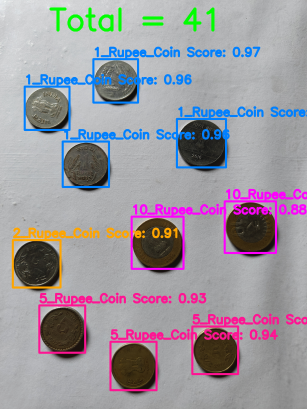

In [26]:
path = "/content/gdrive/MyDrive/yolo/my_model/train/test-data/1000.jpg"
img = cv2.imread(path)
img = prediction(img,model)
scale_percent = 10 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(resized)


# **Video**

In [36]:
import cv2

def write_label_bounding_box(img, class_id, x1, y1, x2, y2, score,result):
  score_str = 'Score: {:.2f}'.format(score)
  class_name = result.names[int(class_id)].replace("₹", "")
  text = class_name + ' ' + score_str

  if class_id == 0:
      color = (255, 128, 0)
  elif class_id == 1:
      color = (0, 165, 255)
  elif class_id == 2:
      color = (147, 20, 255)
  elif class_id == 3:
      color = (255, 0, 255)
  else:
      color = (0, 0, 0)  # Default color

  cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
  cv2.putText(img, text, (int(x1), int(y1 - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2, cv2.LINE_AA)

  return img


In [28]:
def prediction(img,model):
  #img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
  results = model(img)#[0]
  result = results[0]
  threshold = 65
  output = {}
  output['1_Rupee_Coin'],output['2_Rupee_Coin'],output['5_Rupee_Coin'],output['10_Rupee_Coin'] = 0,0,0,0

  for i in result.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = i
    if score >= threshold/100:
      pred_class = result.names[class_id]

      output[pred_class] += 1
      img = write_label_bounding_box(img,class_id,x1, y1, x2, y2,score,result)


  total = (output['1_Rupee_Coin'])+(2*output['2_Rupee_Coin'])+(5*output['5_Rupee_Coin'])+(10*output['10_Rupee_Coin'])

  text = f"Total = {total}"
  font = cv2.FONT_HERSHEY_SIMPLEX
  font_scale = 1
  color = (0, 255, 0)
  thickness = 2
  #text_size = cv2.getTextSize(text, font, font_scale, thickness)[0]
  height, width, _ = img.shape
  #print(height,width)

  # Define the position for the text (adjust as needed)
  x = height - 1000  # X-coordinate (vertical)
  y = width - 1000   # Y-coordinate (horizontal)
  x,y = 50,30

  # Put text on the image
  cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 4, cv2.LINE_AA)

  return img

In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Open the video file
video_path = "/content/gdrive/MyDrive/yolo/my_model/train/test-data/VID20251012214113.mp4"
cap = cv2.VideoCapture(video_path)
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(5))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_path = 'output_video.mp4'
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 inference on the frame
        #results = model(frame)

        # Visualize the results on the frame
        #annotated_frame = results[0].plot()
        annotated_frame = prediction(frame,model)
        #cv2_imshow(annotated_frame)
        out.write(annotated_frame)
        # Convert annotated_frame to OpenCV format
        #annotated_frame = annotated_frame[:, :, ::-1]

        # Display the annotated frame
        #cv2_imshow(annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
# Load the YOLOv8 model
#model = YOLO('yolov8n.pt')

# Open the video file
video_path = "/content/gdrive/MyDrive/yolo/my_model/train/test-data/VID20251012214113.mp4"
cap = cv2.VideoCapture(video_path)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 inference on the frame
        results = model(frame)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2_imshow(annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

In [31]:
# path = "/content/gdrive/MyDrive/yolov8/Object-Detection/coin-det/test-data /VID20230916140100.mp4"
path = "/content/gdrive/MyDrive/yolo/my_model/train/test-data/1000.jpg"
results = model(path)#[0]
result = results[0]
result



image 1/1 /content/gdrive/MyDrive/yolo/my_model/train/test-data/1000.jpg: 640x480 4 1_Rupee_Coins, 1 2_Rupee_Coin, 3 5_Rupee_Coins, 2 10_Rupee_Coins, 388.0ms
Speed: 5.4ms preprocess, 388.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: '1_Rupee_Coin', 1: '2_Rupee_Coin', 2: '5_Rupee_Coin', 3: '10_Rupee_Coin'}
obb: None
orig_img: array([[[239, 236, 232],
        [236, 233, 229],
        [234, 231, 227],
        ...,
        [165, 165, 165],
        [165, 165, 165],
        [163, 163, 163]],

       [[240, 237, 233],
        [236, 233, 229],
        [233, 230, 226],
        ...,
        [162, 162, 162],
        [162, 162, 162],
        [160, 160, 160]],

       [[239, 236, 232],
        [235, 232, 228],
        [232, 229, 225],
        ...,
        [161, 161, 161],
        [163, 163, 163],
        [162, 162, 162]],

       ...,

       [[171, 169, 169],
        [172, 170, 170],
        [174, 172, 172],
        ...,
        [146, 146, 146],
        [144, 144, 144],
        [144, 144, 144]],

       [[174, 172, 172],
        [175, 173, 173],
        [176, 174, 174],
        ...,

In [32]:

len(result.boxes)

10

In [33]:
box = result.boxes[0]
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 0.0
Coordinates: [1770.41015625, 1191.339599609375, 2261.028076171875, 1676.794677734375]
Probability: 0.9747865796089172


In [34]:
result.names

{0: '1_Rupee_Coin', 1: '2_Rupee_Coin', 2: '5_Rupee_Coin', 3: '10_Rupee_Coin'}

In [39]:
import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.imread(path, cv.IMREAD_UNCHANGED)

threshold = 65
output = {}
output['1_Rupee_Coin'],output['2_Rupee_Coin'],output['5_Rupee_Coin'],output['10_Rupee_Coin'] = 0,0,0,0

for i in result.boxes.data.tolist():
  x1, y1, x2, y2, score, class_id = i
  if score >= threshold/100:
    print(score,class_id)
    pred_class = result.names[int(class_id)]

    output[pred_class] += 1
    # cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 20)
    # cv2.putText(img, result.names[int(class_id)].replace("₹",""), (int(x1), int(y1 - 10)),
    #             cv2.FONT_HERSHEY_SIMPLEX, 5, (0, 0, 255), 20, cv2.LINE_AA)
    img = write_label_bounding_box(img,class_id,x1, y1, x2, y2,score,result)


total = (output['1_Rupee_Coin'])+(2*output['2_Rupee_Coin'])+(5*output['5_Rupee_Coin'])+(10*output['10_Rupee_Coin'])
print(f"Total is -------->{total}")
#img = cv2.imread('0.jpg')
scale_percent = 10 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
#cv2_imshow(resized)
#cv2.imwrite('0.jpg',img)

0.9747865796089172 0.0
0.96512770652771 0.0
0.9626885652542114 0.0
0.9603922963142395 0.0
0.9372335076332092 2.0
0.933253288269043 2.0
0.9274010062217712 2.0
0.9148683547973633 1.0
0.8906059861183167 3.0
0.8825430870056152 3.0
Total is -------->41


In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Open the video file
video_path = "/content/gdrive/MyDrive/yolov8/Object-Detection/coin-det/test-data /VID20230916140100.mp4"
cap = cv2.VideoCapture(video_path)
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(5))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_path = 'output_video.avi'
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 inference on the frame
        results = model(frame)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()
        out.write(annotated_frame)
        # Convert annotated_frame to OpenCV format
        #annotated_frame = annotated_frame[:, :, ::-1]

        # Display the annotated frame
        #cv2_imshow(annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
out.release()
cv2.destroyAllWindows()